In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import os 
import random

In [2]:
import tensorflow as tf 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report,log_loss,accuracy_score
from sklearn.model_selection import train_test_split

In [3]:
data_dir='Garbage classification/'

In [4]:
Name=[]
for files in os.listdir(data_dir):
    Name+=[files]
print(Name)

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


In [5]:
N=[]
for i in range(len(Name)):
    N+=[i]
normal_mapping=dict(zip(Name,N))
reverse_mapping=dict(zip(N,Name))
def mapper(value):
    return reverse_mapping[value]
N

[0, 1, 2, 3, 4, 5]

In [13]:
normal_mapping,reverse_mapping

({'cardboard': 0,
  'glass': 1,
  'metal': 2,
  'paper': 3,
  'plastic': 4,
  'trash': 5},
 {0: 'cardboard',
  1: 'glass',
  2: 'metal',
  3: 'paper',
  4: 'plastic',
  5: 'trash'})

In [17]:
dataset=[]
count=0
for files in os.listdir(data_dir):
    path=os.path.join(data_dir,files)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im),grayscale=False,color_mode='rgb',target_size=(60,60))
        image=img_to_array(image)
        
        image=image/255.0
        dataset+=[[image,count]]
    count+=1
    

In [15]:
dataset

[[array([[[0.9647059 , 0.80784315, 0.67058825],
          [0.9529412 , 0.79607844, 0.65882355],
          [0.9647059 , 0.8039216 , 0.6862745 ],
          ...,
          [0.83137256, 0.65882355, 0.54509807],
          [0.85490197, 0.68235296, 0.5686275 ],
          [0.85882354, 0.6862745 , 0.57254905]],
  
         [[0.94509804, 0.7882353 , 0.6509804 ],
          [0.94509804, 0.7882353 , 0.6509804 ],
          [0.9490196 , 0.7882353 , 0.67058825],
          ...,
          [0.8352941 , 0.6627451 , 0.54901963],
          [0.84705883, 0.6745098 , 0.56078434],
          [0.8509804 , 0.6784314 , 0.5647059 ]],
  
         [[0.9254902 , 0.78431374, 0.6431373 ],
          [0.9372549 , 0.79607844, 0.654902  ],
          [0.9607843 , 0.8       , 0.68235296],
          ...,
          [0.8352941 , 0.6745098 , 0.5647059 ],
          [0.85882354, 0.69803923, 0.5803922 ],
          [0.8352941 , 0.6745098 , 0.5568628 ]],
  
         ...,
  
         [[0.69803923, 0.5647059 , 0.45882353],
          [0.6

In [21]:
n=len(dataset)
print(n)

2527


In [28]:
num=[]
for i in range(n):
    num+=[i]
random.shuffle(num)
print(num)

    
    

[431, 1629, 2147, 1993, 1007, 1892, 1340, 466, 1627, 1052, 1432, 1731, 1885, 1690, 1151, 2376, 2220, 1419, 450, 444, 1335, 1418, 724, 615, 230, 537, 1011, 1621, 208, 1333, 1539, 1587, 1396, 989, 324, 7, 1735, 643, 713, 2117, 241, 692, 513, 2031, 453, 1613, 1356, 162, 1498, 2224, 1778, 167, 1886, 2289, 1599, 1634, 334, 2197, 144, 2129, 2081, 1931, 188, 447, 1255, 1455, 2494, 2087, 1384, 83, 2026, 1453, 1291, 82, 210, 2092, 455, 2089, 2015, 922, 787, 1821, 1777, 2364, 1815, 642, 87, 274, 1981, 1239, 2394, 1988, 2285, 137, 2514, 1336, 2332, 73, 2525, 890, 1050, 2520, 1397, 721, 796, 2016, 1315, 176, 1511, 1316, 2022, 1314, 143, 1773, 1658, 897, 1897, 1103, 1852, 139, 1704, 1854, 229, 888, 1499, 623, 1534, 284, 911, 2165, 913, 1828, 2259, 1343, 2284, 2002, 1243, 1871, 855, 1779, 1063, 1808, 2194, 2205, 2451, 2339, 2082, 1971, 212, 1086, 1487, 1470, 28, 1962, 471, 371, 1036, 2214, 622, 636, 2444, 2185, 272, 2516, 2126, 1635, 2276, 533, 2187, 2450, 1436, 138, 1100, 2262, 1107, 90, 2374, 1048

In [30]:
data,labels=zip(*dataset)
data=np.array(data)
labels=np.array(labels)
#training 80% of the dataset 
train=data[num[0:(n//10)*8]]
trainlabel=labels[num[0:(n//10)*8]]

test=data[num[(n//10)*8:]]
testlabel=labels[num[(n//10)*8:]]

In [31]:
trainlabel2=to_categorical(trainlabel)

In [32]:
trainlabel

array([1, 3, 4, ..., 1, 1, 2])

In [33]:
X_train, X_test, y_train, y_test = train_test_split(train, trainlabel2, test_size=0.33, random_state=42)

In [34]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1350, 60, 60, 3)
(1350, 6)
(666, 60, 60, 3)
(666, 6)


In [61]:
datagen=ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,fill_mode='nearest',width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1)



In [62]:
pretrained_model=tf.keras.applications.DenseNet201(input_shape=(60,60,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model.trainable=False

In [63]:
inputs=pretrained_model.input
x=tf.keras.layers.Dense(128,activation='relu')(pretrained_model.output)
output=tf.keras.layers.Dense(6,activation='softmax')(x)
model=tf.keras.Model(inputs=inputs,outputs=output)


In [64]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [65]:
his=model.fit(datagen.flow(X_train,y_train),validation_data=(X_test,y_test),epochs=30)

Epoch 1/30
43/43 [==============================] - 35s 474ms/step - loss: 1.4817 - accuracy: 0.4044 - val_loss: 1.3258 - val_accuracy: 0.4880
Epoch 2/30
43/43 [==============================] - 21s 484ms/step - loss: 1.2667 - accuracy: 0.5141 - val_loss: 1.1860 - val_accuracy: 0.5946
Epoch 3/30
43/43 [==============================] - 22s 521ms/step - loss: 1.1770 - accuracy: 0.5570 - val_loss: 1.1477 - val_accuracy: 0.5706
Epoch 4/30
43/43 [==============================] - 23s 531ms/step - loss: 1.1034 - accuracy: 0.5770 - val_loss: 1.1655 - val_accuracy: 0.5841
Epoch 5/30
43/43 [==============================] - 17s 405ms/step - loss: 1.1048 - accuracy: 0.5896 - val_loss: 1.0947 - val_accuracy: 0.5811
Epoch 6/30
43/43 [==============================] - 17s 395ms/step - loss: 1.0397 - accuracy: 0.6037 - val_loss: 1.1188 - val_accuracy: 0.5946
Epoch 7/30
43/43 [==============================] - 16s 366ms/step - loss: 0.9964 - accuracy: 0.6222 - val_loss: 1.0978 - val_accuracy: 0.6036

In [66]:
y_pred=model.predict(X_test)
pred=np.argmax(y_pred,axis=1)
ground=np.argmax(y_test,axis=1)
print(classification_report(ground,pred))


              precision    recall  f1-score   support

           0       0.80      0.79      0.80        96
           1       0.59      0.59      0.59       133
           2       0.58      0.57      0.57       125
           3       0.72      0.81      0.76       159
           4       0.64      0.60      0.62       123
           5       0.33      0.23      0.27        30

    accuracy                           0.65       666
   macro avg       0.61      0.60      0.60       666
weighted avg       0.65      0.65      0.65       666



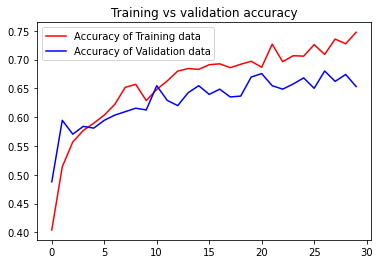

<Figure size 432x288 with 0 Axes>

In [67]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

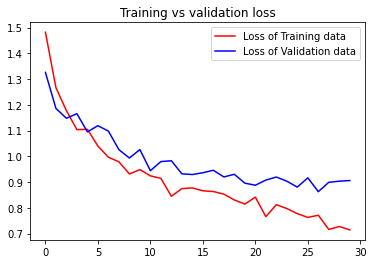

<Figure size 432x288 with 0 Axes>

In [68]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()